In [5]:
#函数库导入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#数据读取/载入，选取特征
data=pd.read_csv('penguins_raw.csv')
data=data[['Species','Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Culmen Length (mm)   342 non-null    float64
 2   Culmen Depth (mm)    342 non-null    float64
 3   Flipper Length (mm)  342 non-null    float64
 4   Body Mass (g)        342 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [10]:
data.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0
3,Adelie Penguin (Pygoscelis adeliae),NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0


In [13]:
#缺失值使用相应列前一个值填充
data=data.fillna(method='ffill')
data.tail()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
339,Chinstrap penguin (Pygoscelis antarctica),55.8,19.8,207.0,4000.0
340,Chinstrap penguin (Pygoscelis antarctica),43.5,18.1,202.0,3400.0
341,Chinstrap penguin (Pygoscelis antarctica),49.6,18.2,193.0,3775.0
342,Chinstrap penguin (Pygoscelis antarctica),50.8,19.0,210.0,4100.0
343,Chinstrap penguin (Pygoscelis antarctica),50.2,18.7,198.0,3775.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Culmen Length (mm)   344 non-null    float64
 2   Culmen Depth (mm)    344 non-null    float64
 3   Flipper Length (mm)  344 non-null    float64
 4   Body Mass (g)        344 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [15]:
#查看企鹅类别
data['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)'], dtype=object)

In [16]:
#查看每个类别的数量
pd.Series(data['Species']).value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [17]:
data.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,344.00000,344.000000,344.000000,344.000000
mean,43.92093,17.143605,200.936047,4201.090116
std,5.45003,1.978342,14.042064,802.213531
min,32.10000,13.100000,172.000000,2700.000000
25%,39.27500,15.575000,190.000000,3550.000000
50%,44.45000,17.300000,197.000000,4050.000000
75%,48.50000,18.700000,213.250000,4756.250000
max,59.60000,21.500000,231.000000,6300.000000


In [ ]:
#可视化
#特征与标签组合的散点可视化

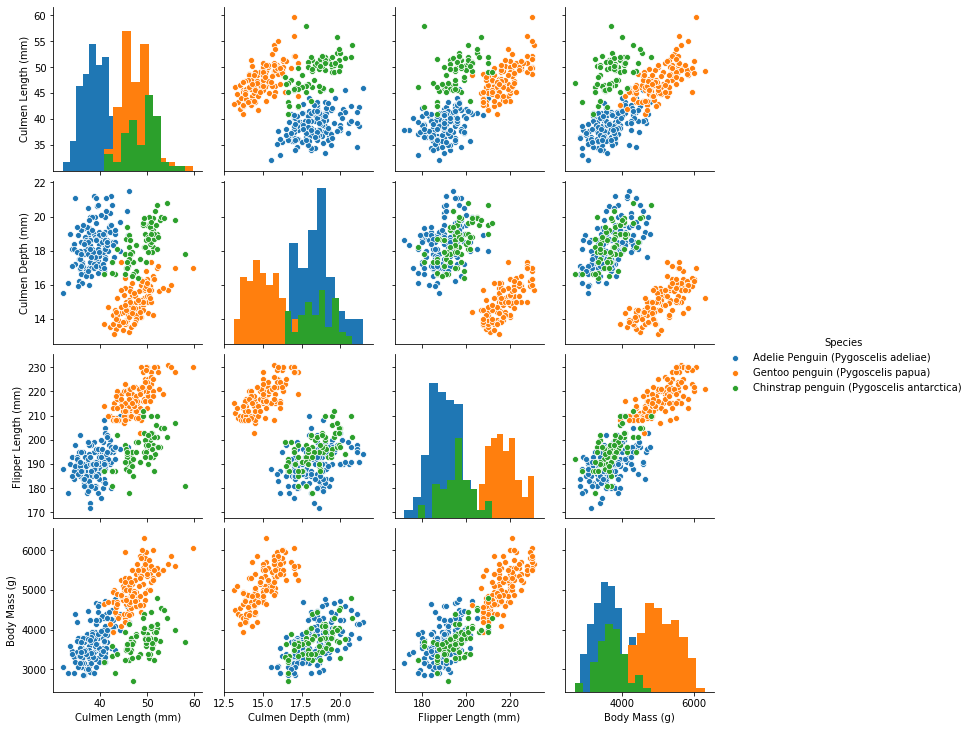

In [19]:
sns.pairplot(data=data,diag_kind='hist',hue='Species')

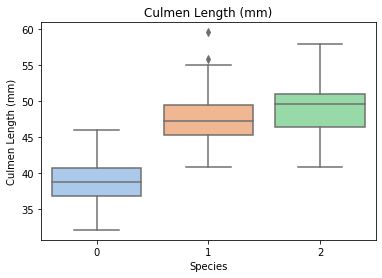

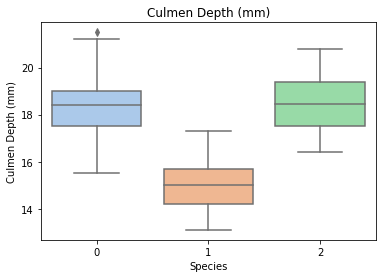

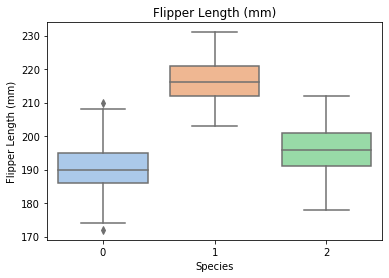

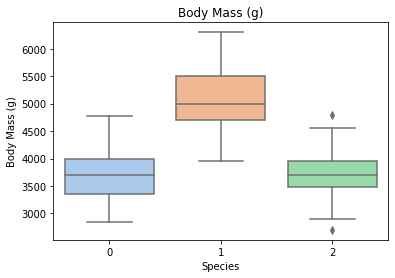

In [28]:
#将类型转换成数字
def trans(x):
    if x==data['Species'].unique()[0]:
        return 0
    if x==data['Species'].unique()[1]:
        return 1
    if x==data['Species'].unique()[2]:
        return 2
data['Species']=data['Species'].apply(trans)
for col in data.columns:
    if col != 'Species':
        sns.boxplot(x='Species',y=col,saturation=0.75,palette='pastel',data=data)
        plt.title(col)
        plt.show()

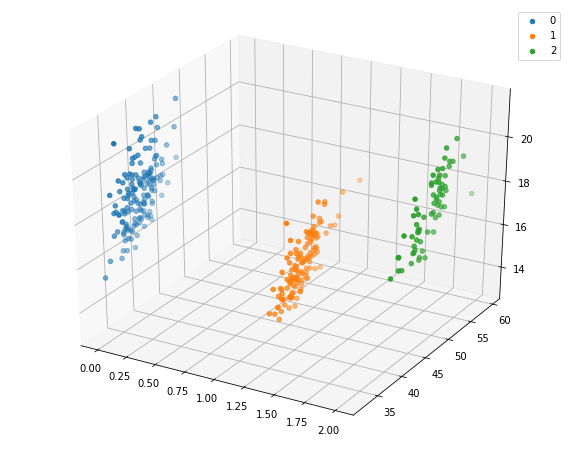

In [29]:
#选取前三个特征绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')

data_class0=data[data['Species']==0].values
data_class1=data[data['Species']==1].values
data_class2=data[data['Species']==2].values

ax.scatter(data_class0[:,0],data_class0[:,1],data_class0[:,2],label=data['Species'].unique()[0])
ax.scatter(data_class1[:,0],data_class1[:,1],data_class1[:,2],label=data['Species'].unique()[1])
ax.scatter(data_class2[:,0],data_class2[:,1],data_class2[:,2],label=data['Species'].unique()[2])
plt.legend()
plt.show()

In [30]:
#二分类模型训练（0和1，不包含2）
from sklearn.model_selection import train_test_split
data_target_part=data[data['Species'].isin([0,1])][['Species']]
data_features_part=data[data['Species'].isin([0,1])][['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]
#random_state是随机数种子(编号)，确保其他参数一样时生成的随机数一样
x_train,x_test,y_train,y_test=train_test_split(data_features_part,data_target_part,test_size=0.2,random_state=2020)

In [31]:
'''
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
'''

"\nDecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,\n           max_features=None, max_leaf_nodes=None,\n           min_impurity_decrease=0.0, min_impurity_split=None,\n           min_samples_leaf=1, min_samples_split=2,\n           min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n           splitter='best')\n"

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#定义决策树模型
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
#可视化
#mac里面直接在终端里输入conda install+包名，就能安装anaconda中不存在的包
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("penguins")

'penguins.pdf'

The accuracy of the Logistic Regression is: 1.0
The accuracy of the Logistic Regression is: 1.0
The confusion matrix result:
 [[31  0]
 [ 0 25]]


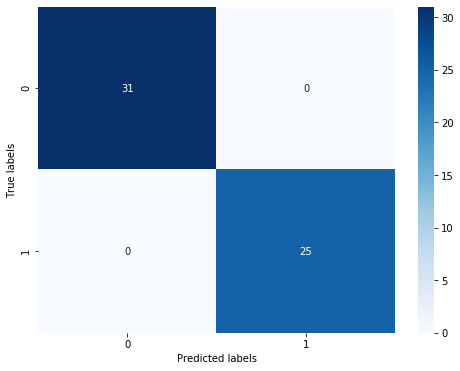

In [37]:
#在训练集与测试集上利用训练好的模型进行预测
train_predict=clf.predict(x_train)
test_predict=clf.predict(x_test)
from sklearn import metrics

print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

confusion_matrix_result=metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [38]:
#利用决策树模型在多分类上进行预测
x_train,x_test,y_train,y_test=train_test_split(data[['Culmen Length (mm)','Culmen Depth (mm)',
                        'Flipper Length (mm)','Body Mass (g)']],data[['Species']],test_size=0.2,random_state=2020)
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
#预测
train_predict=clf.predict(x_train)
test_predict=clf.predict(x_test)
#使用逻辑回归进行概率预测
train_predict_proba=clf.predict_proba(x_train)
test_predict_proba=clf.predict_proba(x_test)
print('The test predict Probability of each class:\n',test_predict_proba)

print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:'),metrics.accuracy_score(y_test,test_predict)

The test predict Probability of each class:
 [[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
The accuracy of the Logistic Regression is: 1.0
The accuracy of the Logistic Regression is:


(None, 0.9565217391304348)

The confusion matrix result:
 [[30  1  0]
 [ 0 23  0]
 [ 2  0 13]]


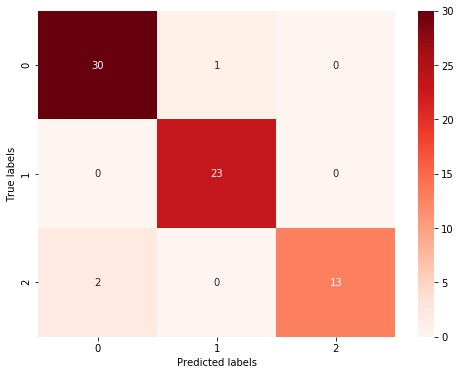

In [41]:
confusion_matrix_result=metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()